In [1]:
import cv2
import numpy as np
import os
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from random import shuffle
import tensornets as nets
from PIL import Image
%matplotlib inline

In [2]:
os.listdir('hackthon-data/ai_train_64/ai_challenger_scene_train/')

['scene_classes.csv', 'scene_train_images', 'scene_labels.csv']

In [3]:
df_a = pd.read_csv('hackthon-data/ai_train_64/ai_challenger_scene_train/scene_labels.csv')

In [4]:
df_a.shape

(53879, 3)

In [5]:
df_a = df_a.loc[df_a.label_id != 'jsessionid=1B3094C4FF247D0E497F91743433395E?r='].reset_index()

In [6]:
len(df_a.label_id.unique())

81

In [7]:
df_a.label_id = df_a.label_id.astype(int)
df_a.drop(['index', 'Unnamed: 0'], axis=1, inplace=True)

In [8]:
df_a.head()

,image_id,label_id
0,79f993ae0858ae238b22968c5934d1ddba585ae4.jpg,66
1,e963208fe9e90df0c385f7367bcdb6d0d5d0b165.jpg,61
2,02df5ecbf7c749ccc9d833f129bbd5d9837940ce.jpg,64
3,5620eb385b7567fb087813cf5233b5ceecdeeca3.jpg,31
4,f8b4d42001a562fc63b9b39c02531661c0e236ca.jpg,19


In [9]:
df_b = pd.read_csv('hackthon-data/ai_train_64/ai_challenger_scene_train/scene_classes.csv', header=None)
df_b.drop(1, axis=1, inplace=True)
df_b.rename({0:'label_id', 2: 'label_name'}, axis=1, inplace=True)

In [10]:
df_b.head()

,label_id,label_name
0,0,airport_terminal
1,1,landing_field
2,2,airplane_cabin
3,3,amusement_park
4,4,skating_rink


In [11]:
df = pd.merge(df_a, df_b, on='label_id', how='inner')

In [12]:
df.head()

,image_id,label_id,label_name
0,79f993ae0858ae238b22968c5934d1ddba585ae4.jpg,66,auto_showroom
1,a74b20339e92d39e00920806f1aa6a3813d9481d.jpg,66,auto_showroom
2,dc389691f5cd2233f1bda34940017b33ff386298.jpg,66,auto_showroom
3,3584d24e091c6f3d79fa1d40f80f2789fac73b46.jpg,66,auto_showroom
4,2a27398da703ac3212858b7f9c442258203ffd8f.jpg,66,auto_showroom


In [13]:
set(df.label_name)

{'airplane_cabin',
 'airport_terminal',
 'amusement_park',
 'aquarium',
 'aqueduct',
 'arena/performance',
 'art_room',
 'assembly_line',
 'athletic_field',
 'auto_showroom',
 'balcony',
 'banquet_hall',
 'bar',
 'baseball_field',
 'basketball_court',
 'bazaar',
 'beauty_salon',
 'bedchamber',
 'bowling_alley',
 'boxing_ring',
 'bridge',
 'campsite',
 'church',
 'classroom',
 'clothing_store',
 'coffee_shop',
 'conference_room',
 'construction_site',
 'countryside',
 'desert/sand',
 'dining_room',
 'discotheque',
 'elevator/staircase',
 'farm/farm_field',
 'firefighting',
 'football_field',
 'forest',
 'garden',
 'gas_station',
 'general_store',
 'golf_course',
 'greenhouse',
 'gymnasium',
 'hospital',
 'igloo/ice_engraving',
 'kitchen',
 'laboratory',
 'lake/river',
 'landfill',
 'landing_field',
 'lawn',
 'library/bookstore',
 'mountain',
 'museum',
 'music_studio',
 'nursery',
 'ocean/beach',
 'office',
 'orchard/vegetable',
 'palace',
 'pasture',
 'pavilion',
 'plaza',
 'racecourse

In [14]:
df.loc[df.label_name == 'airport_terminal', :].head()

,image_id,label_id,label_name
16480,6170cbea8b54c3aac36b3448135a2265a502d6a1.jpg,0,airport_terminal
16481,4da9ecb7c74d6170e6ac6ce20c7cc5a586f9485a.jpg,0,airport_terminal
16482,0281566764968f1527b459bbda402ecf9e20ec40.jpg,0,airport_terminal
16483,544c182febc40b01dce005b760b8dbd291fee718.jpg,0,airport_terminal
16484,f2e160fdfbc3fc716b12629640b02e47f24d8889.jpg,0,airport_terminal


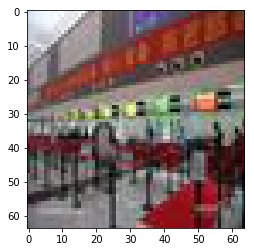

In [15]:
img1 = mpimg.imread('hackthon-data/ai_train_64/ai_challenger_scene_train/scene_train_images/6170cbea8b54c3aac36b3448135a2265a502d6a1.jpg')
imgplot = plt.imshow(img1)
plt.show()

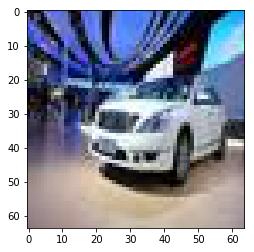

In [16]:
img = mpimg.imread('hackthon-data/ai_train_64/ai_challenger_scene_train/scene_train_images/3584d24e091c6f3d79fa1d40f80f2789fac73b46.jpg')
imgplot = plt.imshow(img)
plt.show()

In [17]:
img.shape

(64, 64, 3)

In [18]:
def indices_to_one_hot(data, nb_classes):
    """
    Convert an iterable of indices to one-hot encoded labels.
    """
    targets = np.array(data).reshape(-1)
    return np.eye(nb_classes)[targets]

In [20]:
ROOT_PATH = "hackthon-data/ai_train_64/ai_challenger_scene_train/scene_train_images/"

In [21]:
df.head()

,image_id,label_id,label_name
0,79f993ae0858ae238b22968c5934d1ddba585ae4.jpg,66,auto_showroom
1,a74b20339e92d39e00920806f1aa6a3813d9481d.jpg,66,auto_showroom
2,dc389691f5cd2233f1bda34940017b33ff386298.jpg,66,auto_showroom
3,3584d24e091c6f3d79fa1d40f80f2789fac73b46.jpg,66,auto_showroom
4,2a27398da703ac3212858b7f9c442258203ffd8f.jpg,66,auto_showroom


In [22]:
def next_batch(num, data, labels):
    '''
    Return a total of num random samples and labels. 
    '''
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = [data[ i] for i in idx]
    labels_shuffle = [labels[ i] for i in idx]
    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

In [23]:
label = []
images = []
for index, row in df.iterrows():
    label.append(indices_to_one_hot(row['label_id'], 80))
    images.append(cv2.imread(ROOT_PATH + row['image_id']))

In [24]:
images_array = np.array(images)
labels_array = np.array(label)

In [ ]:
# np.save('make_checkpoint_folders/images_array.npy', images_array)
# np.save('make_checkpoint_folders/labels_array.npy', labels_array)

In [25]:
labels_array = labels_array.reshape(53876, 80)

In [26]:
learning_rate = 0.002
num_steps = 88000
batch_size = 32
display_step = 1
dropout = 0.50
# dropout = 0.75

keep_prob = tf.placeholder(tf.float32)

In [27]:
x = tf.placeholder(tf.float32, shape=(None, 64, 64, 3), name='input_x')
y = tf.placeholder(tf.float32, shape=(None, 80), name='output_y')

In [28]:
logits = nets.VGG19(x, is_training=True, classes=80)
model = tf.identity(logits, name='logits')

loss_op = tf.losses.softmax_cross_entropy(y, logits)
train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss_op)

correct_pred = tf.equal(tf.argmax(model, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

In [ ]:
# logits.print_outputs()

In [ ]:
# logits.print_summary()

In [ ]:
# init = tf.global_variables_initializer()
# with tf.Session() as sess:
#     # Run the initializer
#     sess.run(init)
#     for step in range(1, num_steps+1):
#         batch_x, batch_y = next_batch(batch_size,images_array,labels_array)
#         # Run optimization op (backprop)
#         sess.run(train_op, feed_dict={X: batch_x, Y: batch_y, keep_prob: 1.0})
#         if step % display_step == 0 or step == 1:
#             # Calculate batch loss and accuracy
#             loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x,Y: batch_y,keep_prob: dropout})
#             print("Step " + str(step) + ", Minibatch Loss= " + \
#                   "{:.4f}".format(loss) + ", Training Accuracy= " + \
#                   "{:.3f}".format(acc))

#     print("Optimization Finished!")

In [29]:
save_model_path = './make_checkpoint_folders_12_Dec'
saver = tf.train.Saver(max_to_keep=3)
print('Training...')
with tf.Session() as sess:
    ckpt = tf.train.get_checkpoint_state(save_model_path)
    # Initializing the variables
    if ckpt and ckpt.model_checkpoint_path:
        print('Restore the model from checkpoint {}.'.format(ckpt.model_checkpoint_path))
        start_step = int(ckpt.model_checkpoint_path.split('/')[-1].split('-')[-1])
        saver.restore(sess, ckpt.model_checkpoint_path)
        print (start_step)
    else:
        sess.run(tf.global_variables_initializer())
        start_step = 0
        print('Start training from new start.')        
        print('global_variables_initializer ... done ...')
        sess.run(logits.pretrained())
        print('model.pretrained ... done ... ')

    # Training cycle
    print('starting training ... ')
    for step in range(start_step, num_steps+1):
        batch_x, batch_y = next_batch(batch_size,images_array,labels_array)
        # Run optimization op (backprop)
        sess.run(train, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
        if step % display_step == 0 or step == 1:
            # Calculate batch loss and accuracy
            loss, acc = sess.run([loss_op, accuracy], feed_dict={x: batch_x,y: batch_y,keep_prob: dropout})
            print("Step " + str(step) + ", Minibatch Loss= " + \
                  "{:.4f}".format(loss) + ", Training Accuracy= " + \
                  "{:.3f}".format(acc))
        if step % 25 == 0:
            saver.save(sess, "make_checkpoint_folders/model.ckpt", global_step=step)
    print("Optimization Finished!")
    saver.save(sess, "final-model.ckpt", global_step=step)

Training...
Start training from new start.
global_variables_initializer ... done ...


ValueError: Dimension 0 in both shapes must be equal, but are 2048 and 25088. Shapes are [2048,4096] and [25088,4096]. for 'Assign_32' (op: 'Assign') with input shapes: [2048,4096], [25088,4096].